### Quality Labels_improving metrics

Load and transform data

In [19]:
import numpy as np
import pandas as pd

# import datasets
red_wine_df=pd.read_csv('winequality-red.csv', sep=';')
white_wine_df=pd.read_csv('winequality-white.csv', sep=';')

# add column 'quality_label'
red_wine_df['quality_label']=red_wine_df['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')
white_wine_df['quality_label']=white_wine_df['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')

# set column as category datatype
white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'],categories=['low','medium','high'])
red_wine_df['quality_label'] = pd.Categorical(red_wine_df['quality_label'],categories=['low','medium','high'])

In [20]:
# add column 'wine_type' for each dataset
white_wine_df['wine type']='white'
red_wine_df['wine type']='red'

# set column as category datatype
white_wine_df['wine type']=pd.Categorical(white_wine_df['wine type'], categories=['white'])
red_wine_df['wine type']=pd.Categorical(red_wine_df['wine type'], categories=['red'])

# standardize column headers
ww_df=white_wine_df
rw_df=red_wine_df

rw_df_2=rw_df.rename(columns={"fixed acidity":"fixed acidity g/dm3","volatile acidity":"volatile acidity g/dm3",\
                              "citric acid":"citric acid g/dm3","residual sugar":"residual sugar g/dm3",\
                                "chlorides":"chlorides g/dm3","free sulfur dioxide":"free sulfur dioxide mg/dm3",\
                                    "total sulfur dioxide":"total sulfur dioxide mg/dm3","density":"density g/cm3",\
                                        "sulphates":"sulphates g/dm3","alcohol":"alcohol % vol"})
ww_df_2=ww_df.rename(columns={"fixed acidity":"fixed acidity g/dm3","volatile acidity":"volatile acidity g/dm3",\
                              "citric acid":"citric acid g/dm3","residual sugar":"residual sugar g/dm3",\
                                "chlorides":"chlorides g/dm3","free sulfur dioxide":"free sulfur dioxide mg/dm3",\
                                    "total sulfur dioxide":"total sulfur dioxide mg/dm3","density":"density g/cm3",\
                                        "sulphates":"sulphates g/dm3","alcohol":"alcohol % vol"})

#     #   add underscore between word
rw_df_2.columns=rw_df_2.columns.str.lower().str.replace(" ","_")
ww_df_2.columns=ww_df_2.columns.str.lower().str.replace(" ","_")

# merge 2 datasets into 1 dataset
red_white_wines_df = pd.concat([ww_df_2, rw_df_2], ignore_index=True)

Machine Learning

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# in order to display plot in jupyter.
%matplotlib inline

# Import necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

# create a dataset copy for ML tasks
red_white_wines_df_ML = red_white_wines_df.copy()

# # show datatype for each column
print(red_white_wines_df_ML.dtypes)

#show columns containing numbers (int64 , float64)
num_col= red_white_wines_df_ML.select_dtypes('number').columns
print(num_col)

#show columns containing object (NOT string such as dtype category)
string_col = red_white_wines_df_ML.select_dtypes(include="object").columns
print(string_col)

#show columns containing categories
category_col = red_white_wines_df_ML.select_dtypes('category').columns
print(category_col)
red_white_wines_df_ML.head()

fixed_acidity_g/dm3             float64
volatile_acidity_g/dm3          float64
citric_acid_g/dm3               float64
residual_sugar_g/dm3            float64
chlorides_g/dm3                 float64
free_sulfur_dioxide_mg/dm3      float64
total_sulfur_dioxide_mg/dm3     float64
density_g/cm3                   float64
ph                              float64
sulphates_g/dm3                 float64
alcohol_%_vol                   float64
quality                           int64
quality_label                  category
wine_type                        object
dtype: object
Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality'],
      dtype='object')
Index(['wine_type'], dtype='object')
Index(['quality_label'], dtype='object')


,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white


<Figure size 800x500 with 0 Axes>

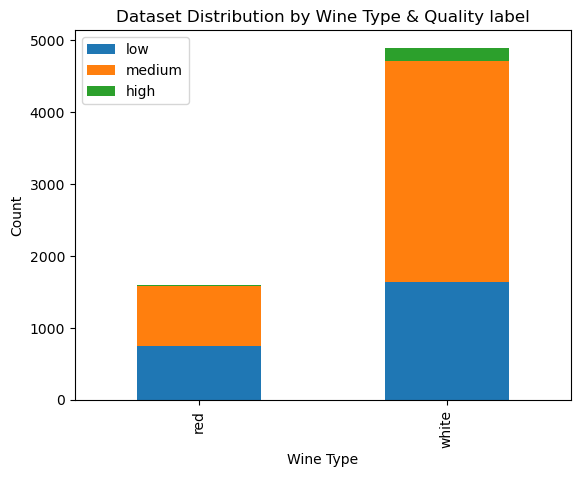

In [ ]:
# overview of dataset distribution by wine type and by quality label

# Group values by feature wine type and  quality label
grouped_df = red_white_wines_df_ML.groupby(['wine_type', 'quality_label'], observed=False)['quality_label'].count().unstack()

# Rename the columns 
grouped_df.columns = ['low', 'medium', 'high']

## colors to be used consistently for this project
# palette={"white": "#DDCC37", "red": "#882020"},
# palette={"low": "#1f77b4", "medium": "#ff7f0e", "high": "#2ca02c"},

# Plot a stacked bar chart
plt.figure(figsize=(8,5))
grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels and title
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Dataset Distribution by Wine Type & Quality label')
plt.show()

Quality label prediction

In [ ]:
# create copy of dataset for quality label ML tasks
red_white_wines_df_ML_2 = red_white_wines_df.copy()
from sklearn.preprocessing import LabelEncoder

# encoding non numerical features
le = LabelEncoder()
red_white_wines_df_ML_2['quality_label'] = le.fit_transform(red_white_wines_df_ML_2['quality_label'])
red_white_wines_df_ML_2['wine_type'] = le.fit_transform(red_white_wines_df_ML_2['wine_type'])

red_white_wines_df_ML_2['quality_label'].head(18)
red_white_wines_df_ML_2.head(18)

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,2,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,2,1


In [25]:
# removing extremely correlated features (avoid data / feature leakage)
red_white_wines_df_ML_quality_label= red_white_wines_df_ML_2.drop('quality', axis=1)
red_white_wines_df_ML_quality_label.columns

Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality_label', 'wine_type'],
      dtype='object')

In [8]:
# create copy of dataset for quality label ML tuned tasks
RW_Wines_df_ML_QL_tuned = red_white_wines_df_ML_quality_label.copy()
RW_Wines_df_ML_QL_tuned.columns

Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality_label', 'wine_type'],
      dtype='object')

In [34]:
# define target y and separate it from the features X
X_ql_tuned = RW_Wines_df_ML_QL_tuned.drop('quality_label', axis=1)
y_ql_tuned = RW_Wines_df_ML_QL_tuned['quality_label']

print("original:", RW_Wines_df_ML_QL_tuned.shape, "\nX_ql_tuned:", X_ql_tuned.shape, "\ny_ql_tuned:", y_ql_tuned.shape)

original: (6497, 13) 
X_ql_tuned: (6497, 12) 
y_ql_tuned: (6497,)


In [35]:
# split dataset into training set and test set
X_ql_tuned_train, X_ql_tuned_test, y_ql_tuned_train, y_ql_tuned_test = train_test_split(X_ql_tuned, y_ql_tuned, test_size=0.2, random_state=42)

In [36]:
# actual result of the target y, expected to be found by the model predictions
actual_results_QL = y_ql_tuned_test

Double checking correlations in the training set

In [31]:
#check correlations of the training dataset
## including quality label in the correlation heatmap
X_ql_train_withQualityLevel= pd.merge(X_ql_tuned_train, RW_Wines_df_ML_QL_tuned['quality_label'], left_index=True, right_index=True)
X_ql_train_withQualityLevel

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,wine_type,quality_label
1916,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2,1,1
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0,1,1
877,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2,1,2
2927,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0,1,2
6063,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,1,2
5191,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,0,2
5226,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,0,2
5390,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,0,2


In [12]:
# For correlation heatmap : split training set by wine type
# initial training set = 5197 rows

X_ql_train_RedWine = X_ql_train_withQualityLevel[X_ql_train_withQualityLevel['wine_type'] == 0]
# Red = 1285 rows

X_ql_train_WhiteWine = X_ql_train_withQualityLevel[X_ql_train_withQualityLevel['wine_type'] == 1]
# White 3912 rows

X_ql_train_WhiteWine

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,wine_type,quality_label
1916,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2,1,1
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0,1,1
877,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2,1,2
2927,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0,1,2
293,6.2,0.28,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.5,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,1,2
466,7.0,0.14,0.32,9.0,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,1,2
3092,7.6,0.27,0.52,3.2,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,1,2
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,1,2


Text(0.5, 1.0, 'Medium_Strong_Positive_Negative_WhiteWine_corr()')

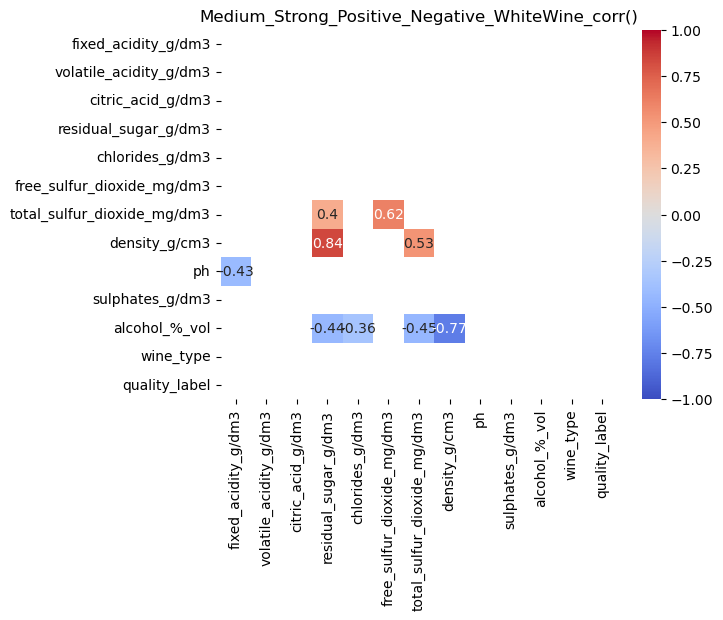

In [13]:
# correlation heatmap by wine type to check if some features are still needed for the model

## correlation heatmap white wine
X_ql_train_corr = X_ql_train_WhiteWine.corr()

ax = plt.axes()
uppertriangle = np.triu(X_ql_train_corr)
sns.heatmap(X_ql_train_corr, vmin=-1, vmax=1, cmap='coolwarm', ax=ax, annot=True, mask=(X_ql_train_corr >= -0.3) & (X_ql_train_corr <= 0.3) | (uppertriangle))

ax.set_title('Medium_Strong_Positive_Negative_WhiteWine_corr()')

Text(0.5, 1.0, 'Medium_Strong_Positive_Negative_RedWine_corr()')

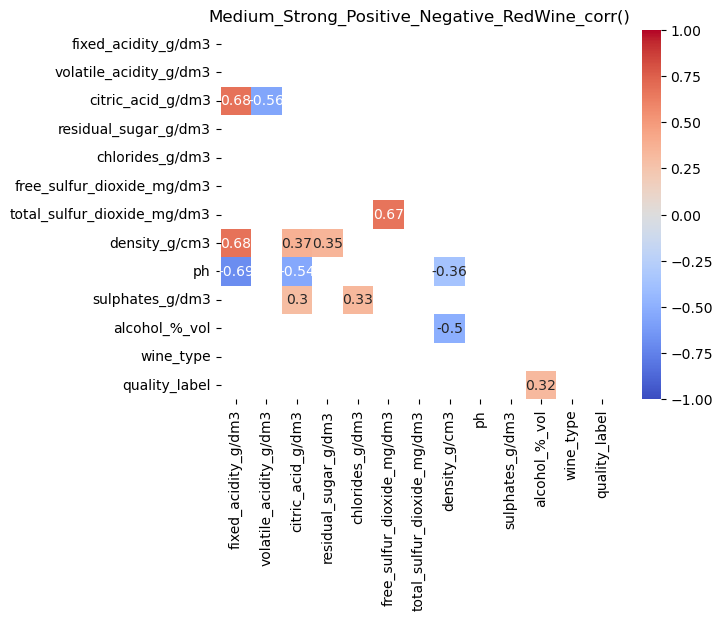

In [14]:
## correlation heatmap red wine
X_ql_train_corr = X_ql_train_RedWine.corr()

ax = plt.axes()
uppertriangle = np.triu(X_ql_train_corr)
sns.heatmap(X_ql_train_corr, vmin=-1, vmax=1, cmap='coolwarm', ax=ax, annot=True, mask=(X_ql_train_corr >= -0.3) & (X_ql_train_corr <= 0.3) | (uppertriangle))

ax.set_title('Medium_Strong_Positive_Negative_RedWine_corr()')

ML tasks to improve model predictions

In [ ]:
# # normalize data (may or may not help, depending on the dataset and model used)
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_ql_tuned_train = scaler.fit_transform(X_ql_tuned_train)
# X_ql_tuned_test = scaler.fit_transform(X_ql_tuned_test)

In [37]:
# dimension reduction

# features in the initial training dataset

# Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
#        'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
#        'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
#        'alcohol_%_vol', 'quality_label', 'wine_type'],
#       dtype='object')

# try and test
##      remove chlorides_g/dm3 sulphates_g/dm3 (not many correlation with other features)
##      remove density_g/cm3 (result of alcohol and sugar)

X_ql_train_DimRed = X_ql_tuned_train.drop('density_g/cm3', axis=1)
X_ql_test_DimRed = X_ql_tuned_test.drop('density_g/cm3', axis=1)

print("original training set:", X_ql_tuned_train.shape, "\nX_ql_train_DimRed:", X_ql_train_DimRed.shape)
print("original testing set:", X_ql_tuned_test.shape, "\nX_ql_test_DimRed:", X_ql_test_DimRed.shape)

X_ql_tuned_train = X_ql_train_DimRed
X_ql_tuned_test = X_ql_test_DimRed
print("current training set:", X_ql_tuned_train.shape, "\ncurrent testing set:", X_ql_tuned_test.shape)
# X_ql_test.shape

original training set: (5197, 12) 
X_ql_train_DimRed: (5197, 11)
original testing set: (1300, 12) 
X_ql_test_DimRed: (1300, 11)
current training set: (5197, 11) 
current testing set: (1300, 11)


In [38]:
# choose model
RF_clf_ql_tuned = RandomForestClassifier(random_state=42)

# train model
RF_clf_ql_tuned.fit(X_ql_tuned_train,y_ql_tuned_train)

# generate predictions
preds_RF_QL_tuned = RF_clf_ql_tuned.predict(X_ql_tuned_test)
# preds_RF_QL

#calculate accuracy
RF_QL_acc_tuned = accuracy_score(actual_results_QL, preds_RF_QL_tuned)
RF_QL_acc_tuned

0.8223076923076923

Assess Model predictions

[[  8   0  24]
 [  0 364 104]
 [  0 103 697]]


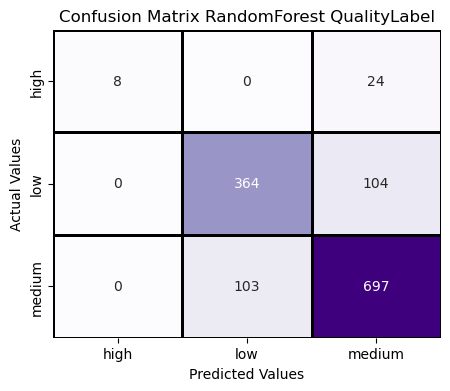

In [39]:
# Confusion matrix Quality Label design
cm_QL_RF_tuned = confusion_matrix(actual_results_QL, preds_RF_QL_tuned)
print(cm_QL_RF_tuned)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_QL_RF_tuned = pd.DataFrame(cm_QL_RF_tuned,
                       index = ["high","low","medium"],
                       columns = ["high","low","medium"])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df_QL_RF_tuned, cmap="Purples", annot=True, cbar=False, linewidths=.8, linecolor='black', fmt='g')
plt.title('Confusion Matrix RandomForest QualityLabel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

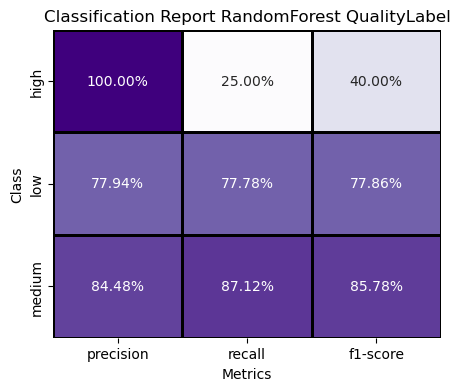

In [40]:
#Classification report quality design
target_names = ['high', 'low', 'medium']
cr_df_QL_RF_tuned = classification_report(actual_results_QL, 
                                   preds_RF_QL_tuned,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(5,4))
sns.heatmap(pd.DataFrame(cr_df_QL_RF_tuned).iloc[:-1, :-3].T,  linewidths=.8, linecolor='black', annot=True, fmt=".2%", cmap="Purples", cbar=False)

plt.title('Classification Report RandomForest QualityLabel')
plt.ylabel('Class')
plt.xlabel('Metrics')
plt.show()

In [43]:
print("Cohen's kappa coefficient for QualityLabel RandomForest", "\n", cohen_kappa_score(actual_results_QL, preds_RF_QL_tuned))

Cohen's kappa coefficient for QualityLabel RandomForest 
 0.6298022160091126


Hyperparameters tuning

In [56]:
# define hyperparameters


n_estimators = np.arange(197,198,1)


# if value too high = risk of overfitting
max_depth = np.arange(25, 55, 2)

min_samples_split = np.arange(2, 4, 2)

# max_features = ["sqrt", "log2", None]
# max_features = list(range(1,X_ql_tuned_train.shape[1]))
max_features = np.arange(1, 4, 1)

param_grid = {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'max_features': max_features,
}

param_grid

{'n_estimators': array([197]),
 'max_depth': array([25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53]),
 'min_samples_split': array([2]),
 'max_features': array([1, 2, 3])}

RandomizedSearchCV

In [57]:
# use randomizedsearchcv to get a (randomized) idea of best settings by hyperparameter

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# # define scoring  
# scoring={'Accuracy': 'accuracy', 
#            'FBeta': make_scorer(fbeta_score, beta = 1),
#            'Recall': 'recall'
#            }

scoring={'Accuracy': 'accuracy'
           }

# redefine model
RF_clf_ql_tuned = RandomForestClassifier(random_state=42)

RS_grid = RandomizedSearchCV(estimator=RF_clf_ql_tuned, param_distributions=param_grid, n_iter=15, scoring=scoring, refit='Accuracy')
RS_grid


# # choose model
# RF_clf_ql_tuned = RandomForestClassifier(random_state=42)

# # train model
# RF_clf_ql_tuned.fit(X_ql_tuned_train,y_ql_tuned_train)

# # generate predictions
# preds_RF_QL_tuned = RF_clf_ql_tuned.predict(X_ql_tuned_test)
# # preds_RF_QL

# #calculate accuracy
# RF_QL_acc_tuned = accuracy_score(actual_results_QL, preds_RF_QL_tuned)
# RF_QL_acc_tuned

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=15,
                   param_distributions={'max_depth': array([25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53]),
                                        'max_features': array([1, 2, 3]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([197])},
                   refit='Accuracy', scoring={'Accuracy': 'accuracy'})

In [58]:
RS_grid.fit(X_ql_tuned_train,y_ql_tuned_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=15,
                   param_distributions={'max_depth': array([25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53]),
                                        'max_features': array([1, 2, 3]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([197])},
                   refit='Accuracy', scoring={'Accuracy': 'accuracy'})

In [59]:
print(
  'best score: ', RS_grid.best_score_,
  '\nparams: ', RS_grid.best_params_
)

best score:  0.8033480787739691 
params:  {'n_estimators': 197, 'min_samples_split': 2, 'max_features': 3, 'max_depth': 25}


In [60]:
RS_grid.cv_results_

{'mean_fit_time': array([6.0567256 , 4.92495666, 4.93285804, 5.50845122, 4.20217428,
        5.19420009, 5.01573825, 7.14435925, 3.58297362, 3.65733042,
        3.72608514, 4.74793243, 2.79254446, 6.59104748, 7.4912436 ]),
 'std_fit_time': array([2.01314819, 0.6268882 , 1.26691443, 1.79357543, 0.8053132 ,
        0.98270589, 0.76028353, 2.3470406 , 1.07014857, 0.99308971,
        0.81698432, 0.83117311, 0.53716952, 1.40880026, 0.74298024]),
 'mean_score_time': array([0.12864928, 0.13252869, 0.23371158, 0.23896513, 0.12552619,
        0.2554409 , 0.14279833, 0.16742244, 0.17793941, 0.13427186,
        0.17677746, 0.11920285, 0.10912604, 0.23505473, 0.17114463]),
 'std_score_time': array([0.0541017 , 0.03049352, 0.06894525, 0.1557875 , 0.02868463,
        0.14588841, 0.05664046, 0.07643432, 0.08113695, 0.03596708,
        0.1058727 , 0.02840386, 0.03482741, 0.13355801, 0.07372308]),
 'param_n_estimators': masked_array(data=[197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197,
         

In [61]:
grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_Accuracy"], columns=["Accuracy"])
], axis=1)

# final_df = df.sort_values(by=['2'], ascending=False)
grid_results.sort_values(by=['Accuracy'], ascending=False)

,n_estimators,min_samples_split,max_features,max_depth,Accuracy
14,197,2,3,25,0.803348
4,197,2,1,31,0.803347
2,197,2,1,39,0.803154
10,197,2,1,53,0.803154
12,197,2,1,37,0.803154
9,197,2,1,27,0.802385
8,197,2,1,29,0.801808
6,197,2,3,29,0.801040
0,197,2,3,35,0.800847
13,197,2,3,53,0.800847


GridSearchCV

In [ ]:
# define hyperparameters for gridsearchcv

n_estimators = np.arange(197,198,1)
max_depth = np.arange(29, 33, 1)
min_samples_split = np.arange(2, 3, 1)
max_features =np.arange(1, 2, 1)

param_grid_GridSearch = {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'max_features': max_features,
}

param_grid_GridSearch

In [ ]:
# use gridsearchcv to find best settings by hyperparameter
from sklearn.model_selection import GridSearchCV

# redefine model
RF_clf_ql_tuned = RandomForestClassifier(random_state=42)

GS_grid = GridSearchCV(estimator=RF_clf_ql_tuned, param_grid=param_grid_GridSearch)
GS_grid

In [ ]:
# GS_grid.fit(X_ql_tuned_train,y_ql_tuned_train)

# after running 40m 27.9s
# best score:  0.8787345075016308 
# params:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 170}

In [ ]:
# print(
#   'best score: ', GS_grid.best_score_,
#   '\nparams: ', GS_grid.best_params_
# )